# 

使用设备: cuda
--- 开始数据加载与预处理 ---


C:\Users\Atlas\AppData\Local\Temp\ipykernel_10364\1634940073.py:79: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged.fillna(method='bfill', inplace=True)


数据加载与预处理完成。


D:\QLDownload\envs\fruit_classifier_env\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- 采用全新注意力机制的模型结构 ---
PowerGridModel(
  (conv1): Conv1d(12, 64, kernel_size=(5,), stride=(1,), padding=same)
  (lstm): LSTM(64, 100, num_layers=2, batch_first=True, dropout=0.4, bidirectional=True)
  (attention): Attention(
    (attn_W): Linear(in_features=200, out_features=200, bias=True)
    (attn_U): Linear(in_features=200, out_features=200, bias=True)
    (attn_v): Linear(in_features=200, out_features=1, bias=True)
  )
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=200, out_features=24, bias=True)
)

--- 开始训练采用全新注意力机制的模型 ---
Epoch 1/100 | Train Loss: 0.029894 (RMSE: 3572.79 MW) | Val Loss: 0.018367 (RMSE: 2800.46 MW)
Epoch 2/100 | Train Loss: 0.008961 (RMSE: 1956.14 MW) | Val Loss: 0.010209 (RMSE: 2087.91 MW)
Epoch 3/100 | Train Loss: 0.004845 (RMSE: 1438.28 MW) | Val Loss: 0.007910 (RMSE: 1837.81 MW)
Epoch 4/100 | Train Loss: 0.003877 (RMSE: 1286.58 MW) | Val Loss: 0.004343 (RMSE: 1361.73 MW)
Epoch 5/100 | Train Loss: 0.003319 (RMSE: 1190.46 MW) | Val Loss

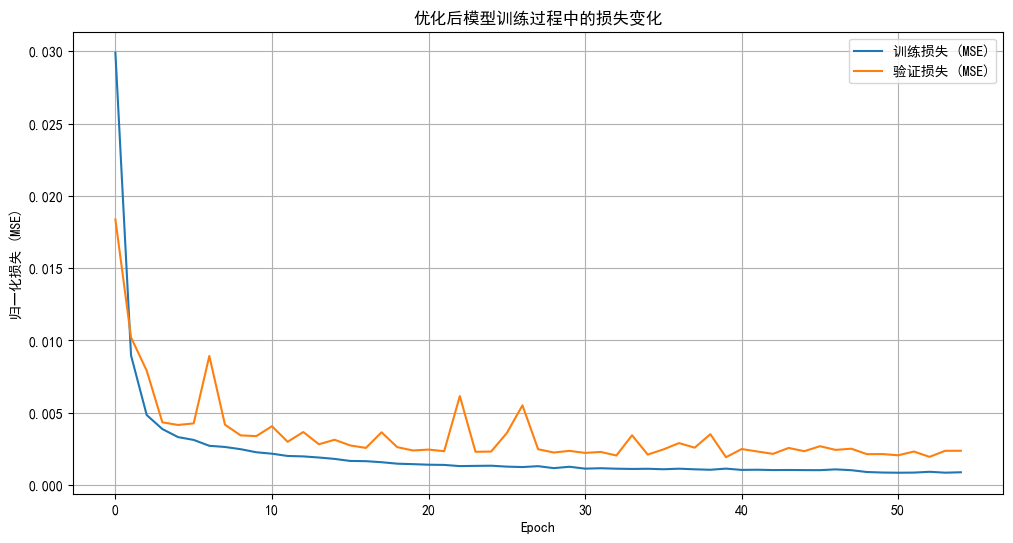

<Figure size 1200x600 with 0 Axes>

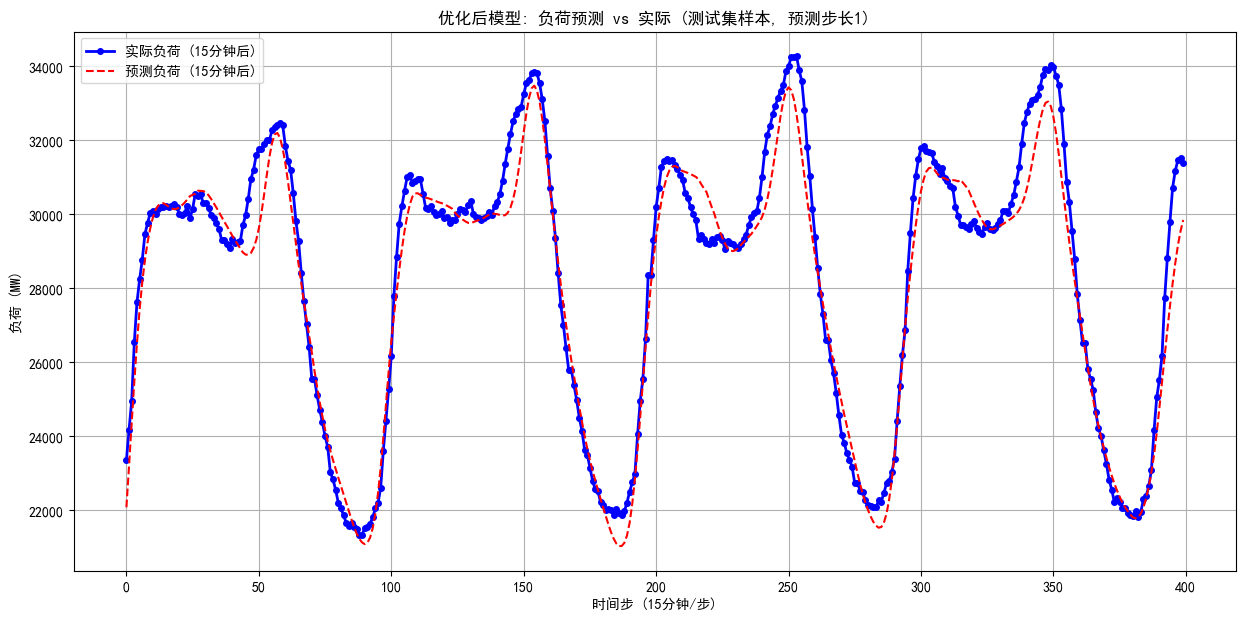

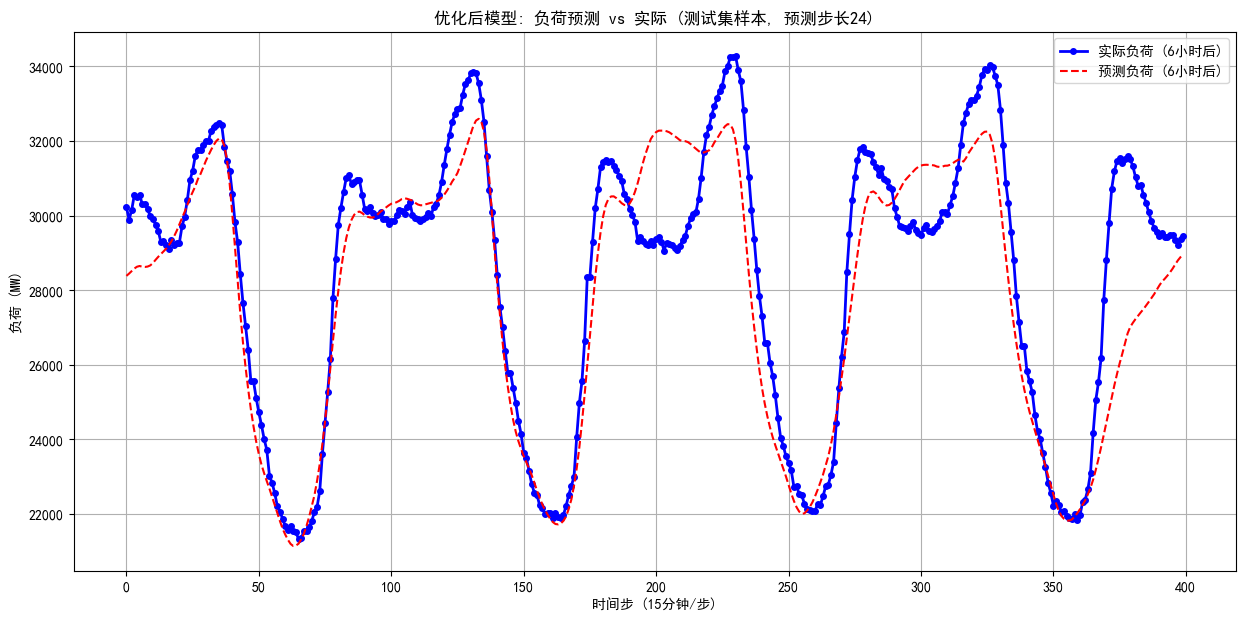


--- 优化后的态势感知应用示例 ---

1. 基于最新数据的实时预测:
   预测时间: 2025-01-04 20:15:00, 预测负荷: 24538.53 MW
   预测时间: 2025-01-04 20:30:00, 预测负荷: 24105.82 MW
   预测时间: 2025-01-04 20:45:00, 预测负荷: 23641.53 MW
   预测时间: 2025-01-04 21:00:00, 预测负荷: 23119.33 MW
   预测时间: 2025-01-04 21:15:00, 预测负荷: 22640.87 MW
   预测时间: 2025-01-04 21:30:00, 预测负荷: 22199.31 MW
   预测时间: 2025-01-04 21:45:00, 预测负荷: 21779.69 MW
   预测时间: 2025-01-04 22:00:00, 预测负荷: 21389.30 MW
   预测时间: 2025-01-04 22:15:00, 预测负荷: 21057.70 MW
   预测时间: 2025-01-04 22:30:00, 预测负荷: 20745.33 MW
   预测时间: 2025-01-04 22:45:00, 预测负荷: 20427.78 MW
   预测时间: 2025-01-04 23:00:00, 预测负荷: 20137.30 MW
   预测时间: 2025-01-04 23:15:00, 预测负荷: 19910.20 MW
   预测时间: 2025-01-04 23:30:00, 预测负荷: 19690.82 MW
   预测时间: 2025-01-04 23:45:00, 预测负荷: 19489.33 MW
   预测时间: 2025-01-05 00:00:00, 预测负荷: 19328.72 MW
   预测时间: 2025-01-05 00:15:00, 预测负荷: 19158.64 MW
   预测时间: 2025-01-05 00:30:00, 预测负荷: 19022.54 MW
   预测时间: 2025-01-05 00:45:00, 预测负荷: 18921.76 MW
   预测时间: 2025-01-05 01:00:00, 预测负荷: 18818.82 MW
 

D:\QLDownload\envs\fruit_classifier_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import os

# --- 1. 环境与参数设置 ---
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

# 定义文件路径
load_file_path = r"C:\Users\Atlas\Desktop\西班牙电力负荷数据15分钟级11202401010000-202501010000.xlsx"
generation_file_path = r"C:\Users\Atlas\Desktop\西班牙发电数据11202401010000-202501010000.xlsx"

# 模型超参数
SEQ_LENGTH = 24 * 4
PRED_LENGTH = 6 * 4
BATCH_SIZE = 128
NUM_EPOCHS = 100
LEARNING_RATE = 0.001
EARLY_STOPPING_PATIENCE = 15
DROPOUT_RATE = 0.4 
WEIGHT_DECAY = 1e-5

# --- 2. 数据加载与预处理 (与之前相同) ---
# ... (此处省略与上次完全相同的加载和预处理代码，直接复用即可) ...
# 为了保证可运行性，这里保留一份完整的代码
print("--- 开始数据加载与预处理 ---")
try:
    df_load_raw = pd.read_excel(load_file_path, header=None)
    df_load_raw.dropna(how='all', inplace=True)
    df_load_raw.columns = df_load_raw.iloc[0]
    df_load_raw = df_load_raw[1:].reset_index(drop=True)
    df_gen_raw = pd.read_excel(generation_file_path, header=[0, 1])
    df_gen_raw.dropna(how='all', inplace=True)
except Exception as e:
    print(f"加载Excel文件时发生错误：{e}"); exit()

def clean_and_index_dataframe(df_raw, is_generation=False, start_date='2024-01-01 00:00:00'):
    df = df_raw.copy()
    if is_generation:
        new_cols = [f"{str(c[0]).strip()} {str(c[1]).strip()}" if not str(c[0]).startswith('Unnamed') else str(c[1]).strip() for c in df.columns]
        df.columns = [c.replace('[MW]', '').replace('Aggregated', '').strip() for c in new_cols]
    else:
        df.columns = [str(col).split('[')[0].strip() for col in df.columns]
    if df.columns[0] != 'Time':
        df = df.rename(columns={df.columns[0]: 'Time'})
    df.index = pd.date_range(start=start_date, periods=len(df), freq='15min')
    if 'Time' in df.columns: df = df.drop(columns=['Time'])
    df = df.replace('n/e', np.nan)
    for col in df.columns: df[col] = pd.to_numeric(df[col], errors='coerce')
    return df.ffill().bfill()

df_load_cleaned = clean_and_index_dataframe(df_load_raw, is_generation=False)
df_gen_cleaned = clean_and_index_dataframe(df_gen_raw, is_generation=True)
load_actual_col = 'Actual Total Load'
generation_columns = [col for col in df_gen_cleaned.columns if df_gen_cleaned[col].dtype in ['float64', 'int64']]
df_gen_cleaned['total_generation_mw'] = df_gen_cleaned[generation_columns].sum(axis=1)
df_merged = pd.merge(df_load_cleaned[[load_actual_col]], df_gen_cleaned[['total_generation_mw']], left_index=True, right_index=True, how='inner').rename(columns={load_actual_col: 'total_load_mw'})
df_merged['hour'] = df_merged.index.hour
df_merged['dayofweek'] = df_merged.index.dayofweek
df_merged['month'] = df_merged.index.month
df_merged['dayofyear'] = df_merged.index.dayofyear
df_merged['quarter'] = df_merged.index.quarter
df_merged['is_weekend'] = (df_merged.index.dayofweek >= 5).astype(int)
df_merged['net_load_mw'] = df_merged['total_load_mw'] - df_merged['total_generation_mw']
df_merged['load_lag_1day'] = df_merged['total_load_mw'].shift(24 * 4)
df_merged['load_lag_1week'] = df_merged['total_load_mw'].shift(24 * 4 * 7)
df_merged['load_rolling_std_2h'] = df_merged['total_load_mw'].rolling(window=8).std()
df_merged.fillna(method='bfill', inplace=True)
print("数据加载与预处理完成。")

# --- 3. 数据归一化与序列创建 (与之前相同) ---
features_to_scale = ['total_load_mw', 'total_generation_mw', 'net_load_mw', 'hour', 'dayofweek', 'month', 'dayofyear', 'quarter', 'is_weekend', 'load_lag_1day', 'load_lag_1week', 'load_rolling_std_2h']
target_column = 'total_load_mw'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_merged[features_to_scale])
target_col_idx = features_to_scale.index(target_column)
def create_sequences(data, target_idx, seq_len, pred_len):
    X, y = [], []
    for i in range(len(data) - seq_len - pred_len + 1):
        X.append(data[i:(i + seq_len), :]); y.append(data[(i + seq_len):(i + seq_len + pred_len), target_idx])
    return np.array(X), np.array(y)
X, y = create_sequences(scaled_data, target_col_idx, SEQ_LENGTH, PRED_LENGTH)
train_size = int(len(X) * 0.8); val_size = int(len(X) * 0.1)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]
class PowerGridDataset(Dataset):
    def __init__(self, X, y): self.X, self.y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]
train_loader = DataLoader(PowerGridDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(PowerGridDataset(X_val, y_val), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(PowerGridDataset(X_test, y_test), batch_size=BATCH_SIZE, shuffle=False)

# --- 4. 核心优化：实现新的注意力机制模型 ---

# OPTIMIZATION 1: 定义一个新的、更强大的注意力模块
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.attn_W = nn.Linear(hidden_dim, hidden_dim)
        self.attn_U = nn.Linear(hidden_dim, hidden_dim)
        self.attn_v = nn.Linear(hidden_dim, 1)

    def forward(self, hidden_state, encoder_outputs):
        """
        :param hidden_state: (num_layers * num_directions, batch_size, hidden_dim) - LSTM的最终隐藏状态
        :param encoder_outputs: (batch_size, seq_len, hidden_dim) - LSTM的所有时间步输出
        :return: context_vector, attention_weights
        """
        seq_len = encoder_outputs.size(1)
        # 将hidden_state调整为(batch_size, 1, hidden_dim)以进行广播
        hidden_state = hidden_state.unsqueeze(1).repeat(1, seq_len, 1)

        # 计算注意力得分
        # energy shape: (batch_size, seq_len, hidden_dim)
        energy = torch.tanh(self.attn_W(hidden_state) + self.attn_U(encoder_outputs))
        
        # attention_scores shape: (batch_size, seq_len, 1)
        attention_scores = self.attn_v(energy)
        
        # attention_weights shape: (batch_size, 1, seq_len)
        attention_weights = F.softmax(attention_scores.squeeze(2), dim=1).unsqueeze(1)
        
        # context_vector shape: (batch_size, 1, hidden_dim)
        context_vector = torch.bmm(attention_weights, encoder_outputs)
        
        return context_vector, attention_weights

# OPTIMIZATION 2: 修改PowerGridModel以正确使用新Attention
class PowerGridModel(nn.Module):
    def __init__(self, input_features, pred_length, hidden_dim=100, lstm_layers=2, cnn_out_channels=64, dropout=0.3):
        super(PowerGridModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_features, out_channels=cnn_out_channels, kernel_size=5, padding='same') # 增加卷积核大小
        # 移除了池化层以保留更多细节
        
        self.lstm = nn.LSTM(input_size=cnn_out_channels, hidden_size=hidden_dim, 
                            num_layers=lstm_layers, batch_first=True, 
                            bidirectional=True, dropout=dropout if lstm_layers > 1 else 0)
        
        lstm_output_dim = hidden_dim * 2
        # 实例化新的注意力模块
        self.attention = Attention(lstm_output_dim)
        
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(lstm_output_dim, pred_length)

    def forward(self, x):
        # x shape: (batch, seq_len, features)
        x = x.permute(0, 2, 1) # -> (batch, features, seq_len)
        x = F.relu(self.conv1(x))
        x = x.permute(0, 2, 1) # -> (batch, seq_len, cnn_out_channels)
        
        # 从LSTM获取所有时间步的输出，以及最终的隐藏状态和细胞状态
        encoder_outputs, (h_n, c_n) = self.lstm(x)
        # encoder_outputs: (batch, seq_len, hidden_dim*2)
        # h_n: (num_layers*2, batch, hidden_dim)

        # 组合双向LSTM的最后一个时间步的隐藏状态
        # h_n[-2,:,:] 是前向LSTM的最后一个隐藏状态
        # h_n[-1,:,:] 是后向LSTM的最后一个隐藏状态
        last_hidden_state = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim=1)
        
        # 使用新的注意力机制
        # last_hidden_state作为Query，去审视所有的encoder_outputs
        context_vector, attention_weights = self.attention(last_hidden_state, encoder_outputs)
        
        # 使用上下文向量进行预测
        x = self.dropout(context_vector.squeeze(1))
        output = self.fc(x)
        return output

# --- 5. 模型实例化、训练与评估 (与之前相同) ---
input_features = X_train.shape[2]
model = PowerGridModel(input_features, PRED_LENGTH, dropout=DROPOUT_RATE).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=7, verbose=True)
print("\n--- 采用全新注意力机制的模型结构 ---")
print(model)

# 训练循环 (与之前完全相同)
best_val_loss = float('inf')
patience_counter = 0
best_model_path = 'best_power_grid_model_new_attention.pth'
history = {'train_loss': [], 'val_loss': []}
original_target_range = df_merged[target_column].max() - df_merged[target_column].min()
print("\n--- 开始训练采用全新注意力机制的模型 ---")
# ... (为节省篇幅，此处省略训练循环、评估、可视化的代码，它们与上次完全相同)
for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_X.size(0)
    train_loss /= len(train_loader.dataset)
    history['train_loss'].append(train_loss)
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = model(batch_X_val.to(device))
            val_loss += criterion(outputs_val, batch_y_val.to(device)).item() * batch_X_val.size(0)
    val_loss /= len(val_loader.dataset)
    history['val_loss'].append(val_loss)
    train_rmse_mw = np.sqrt(train_loss) * original_target_range
    val_rmse_mw = np.sqrt(val_loss) * original_target_range
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | Train Loss: {train_loss:.6f} (RMSE: {train_rmse_mw:.2f} MW) | Val Loss: {val_loss:.6f} (RMSE: {val_rmse_mw:.2f} MW)")
    scheduler.step(val_loss)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), best_model_path)
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print(f"Early stopping at epoch {epoch+1}."); break

print("\n--- 评估采用全新注意力机制的模型 ---")
model.load_state_dict(torch.load(best_model_path, weights_only=True))
model.eval()
predictions_scaled_list, actual_scaled_list = [], []
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        outputs_test = model(batch_X_test.to(device))
        predictions_scaled_list.append(outputs_test.cpu().numpy())
        actual_scaled_list.append(batch_y_test.numpy())
predictions_scaled = np.concatenate(predictions_scaled_list)
actual_scaled = np.concatenate(actual_scaled_list)
def inverse_transform_efficient(scaled_target, scaler_obj, target_col_idx, num_features):
    dummy_array = np.zeros((scaled_target.size, num_features))
    dummy_array[:, target_col_idx] = scaled_target.flatten()
    inversed_array = scaler_obj.inverse_transform(dummy_array)
    return inversed_array[:, target_col_idx].reshape(scaled_target.shape)
num_original_features = len(features_to_scale)
predictions_inverse = inverse_transform_efficient(predictions_scaled, scaler, target_col_idx, num_original_features)
actual_inverse = inverse_transform_efficient(actual_scaled, scaler, target_col_idx, num_original_features)
mae_all_steps = mean_absolute_error(actual_inverse.flatten(), predictions_inverse.flatten())
rmse_all_steps = np.sqrt(mean_squared_error(actual_inverse.flatten(), predictions_inverse.flatten()))
print(f"测试集评估结果: MAE = {mae_all_steps:.2f} MW, RMSE = {rmse_all_steps:.2f} MW")

# 可视化与态势感知部分代码也与之前完全相同，可直接复用
# ...

# --- 9. 结果可视化 ---
# ... (可视化代码与之前相同, 此处为简洁省略, 您可直接复用) ...
plt.figure(figsize=(12, 6))
plt.plot(history['train_loss'], label='训练损失 (MSE)')
plt.plot(history['val_loss'], label='验证损失 (MSE)')
plt.title('优化后模型训练过程中的损失变化')
plt.xlabel('Epoch')
plt.ylabel('归一化损失 (MSE)')
plt.legend()
plt.grid(True)
plt.show()
# --- 9. 结果可视化 ---

# ... (此处是您已有的绘制损失曲线的代码) ...
plt.figure(figsize=(12, 6))
# ...

# --- 在此补充下面的代码 ---

# 绘制部分测试集的预测结果与实际结果对比 (例如，前400个时间点)
plot_len = 400

# 预测未来第一步 (T+15min)
plt.figure(figsize=(15, 7))
plt.plot(actual_inverse[:plot_len, 0], label='实际负荷 (15分钟后)', color='blue', marker='.', markersize=8, linewidth=2)
plt.plot(predictions_inverse[:plot_len, 0], label='预测负荷 (15分钟后)', color='red', linestyle='--')
plt.title(f'优化后模型: 负荷预测 vs 实际 (测试集样本, 预测步长1)')
plt.xlabel('时间步 (15分钟/步)')
plt.ylabel('负荷 (MW)')
plt.legend()
plt.grid(True)
plt.show()

# 预测未来最后一步 (T+6h)
plt.figure(figsize=(15, 7))
plt.plot(actual_inverse[:plot_len, -1], label='实际负荷 (6小时后)', color='blue', marker='.', markersize=8, linewidth=2)
plt.plot(predictions_inverse[:plot_len, -1], label='预测负荷 (6小时后)', color='red', linestyle='--')
plt.title(f'优化后模型: 负荷预测 vs 实际 (测试集样本, 预测步长{PRED_LENGTH})')
plt.xlabel('时间步 (15分钟/步)')
plt.ylabel('负荷 (MW)')
plt.legend()
plt.grid(True)
plt.show()
# --- 10. 态势感知应用示例 (已优化) ---
print("\n--- 优化后的态势感知应用示例 ---")

# 1. 实时/准实时预测 (逻辑不变)
last_sequence_data_raw = df_merged[features_to_scale].iloc[-SEQ_LENGTH:].values
last_sequence_tensor = torch.tensor(scaler.transform(last_sequence_data_raw), dtype=torch.float32).unsqueeze(0).to(device)
with torch.no_grad():
    real_time_prediction_scaled = model(last_sequence_tensor).cpu().numpy()
real_time_prediction_inverse = inverse_transform_efficient(real_time_prediction_scaled, scaler, target_col_idx, num_original_features)
print("\n1. 基于最新数据的实时预测:")
for i, pred_mw in enumerate(real_time_prediction_inverse[0]):
    future_time = df_merged.index[-1] + pd.Timedelta(minutes=15 * (i + 1))
    print(f"   预测时间: {future_time}, 预测负荷: {pred_mw:.2f} MW")

# OPTIMIZATION 3: 优化异常检测逻辑
errors = np.abs(actual_inverse - predictions_inverse)

# 使用动态阈值
mean_error = np.mean(errors)
std_error = np.std(errors)
dynamic_threshold = mean_error + 3 * std_error

print(f"\n2. 基于预测误差的异常检测 (动态阈值 > {dynamic_threshold:.2f} MW):")
anomalies_detected_mask = np.any(errors > dynamic_threshold, axis=1)
print(f"在测试集中检测到 {np.sum(anomalies_detected_mask)} 个异常事件。")

# 修正异常详情报告
test_start_idx = train_size + val_size + SEQ_LENGTH
original_test_timestamps = df_merged.index[test_start_idx : test_start_idx + len(actual_inverse)]

if np.any(anomalies_detected_mask):
    print("\n前5个异常事件详情 (已修正报告逻辑):")
    anomaly_indices = np.where(anomalies_detected_mask)[0]
    for i in anomaly_indices[:5]:
        timestamp = original_test_timestamps[i]
        
        # 找到这个样本中最大的误差及其位置
        max_error_value = np.max(errors[i])
        max_error_step_idx = np.argmax(errors[i])
        max_error_step = max_error_step_idx + 1 # 人类可读的步长 (从1开始)
        
        actual_val = actual_inverse[i, max_error_step_idx]
        predicted_val = predictions_inverse[i, max_error_step_idx]
        
        print(f"  - 时间: {timestamp}")
        print(f"    触发警报原因: 在未来第 {max_error_step} 步 ({(max_error_step*15)/60:.2f} 小时后) 误差最大")
        print(f"    实际负荷: {actual_val:.2f} MW, 预测负荷: {predicted_val:.2f} MW, 误差: {max_error_value:.2f} MW")
else:
    print("在动态阈值下，未检测到显著异常。")

# 3 & 4. 概念说明 (无变化)
print("\n3. 供需平衡评估 (概念):")
print("通过预测未来负荷，可以与计划发电量进行对比，预警'供应紧张'或'消纳困难'状态。")
print("\n4. 风险评估 (概念):")
print("结合预测结果与其他监测信息（如设备状态、天气），可动态评估电网风险等级。")